In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

In [30]:
np.any(x.values) < 0

False

In [31]:
sk_best = SelectKBest(chi2, 5)
sk_best.fit(x, y)

SelectKBest(k=5, score_func=<function chi2 at 0x1a12fad2f0>)

In [32]:
sk_best.get_support()

array([False,  True,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [34]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('Accuracy: ',tree_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test.values,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test.values, y_pred))
dt_scores = cross_val_score(tree_clf, x_train, y_train, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.742081447964
Precision:  0.5
Recall:  0.502923976608
F1 Score:  0.501457725948
Confusion Matrix:
 [[406  86]
 [ 85  86]]
Avg. 10-fold Cross Validation Accuracy:  0.763745212087


In [35]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Accuracy: ',rf_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(rf_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.79185520362
Precision:  0.677419354839
Recall:  0.368421052632
F1 Score:  0.477272727273
Confusion Matrix:
 [[462  30]
 [108  63]]
Avg. 10-fold Cross Validation Accuracy:  0.779665489754


In [36]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train, y_train)
y_pred = ab_clf.predict(x_test)
print('Accuracy: ',ab_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(ab_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.796380090498
Precision:  0.647540983607
Recall:  0.461988304094
F1 Score:  0.539249146758
Confusion Matrix:
 [[449  43]
 [ 92  79]]
Avg. 10-fold Cross Validation Accuracy:  0.805325228406


In [37]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
print('Accuracy: ',knn_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(knn_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.731523378582
Precision:  0.466666666667
Recall:  0.286549707602
F1 Score:  0.355072463768
Confusion Matrix:
 [[436  56]
 [122  49]]
Avg. 10-fold Cross Validation Accuracy:  0.706620136134


In [38]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred = nb_clf.predict(x_test)
print('Accuracy: ',nb_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(nb_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.758672699849
Precision:  0.564705882353
Recall:  0.280701754386
F1 Score:  0.375
Confusion Matrix:
 [[455  37]
 [123  48]]
Avg. 10-fold Cross Validation Accuracy:  0.736489462381


In [39]:
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
print('Accuracy: ',svm_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(svm_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.748114630468
Precision:  0.833333333333
Recall:  0.0292397660819
F1 Score:  0.0564971751412
Confusion Matrix:
 [[491   1]
 [166   5]]
Avg. 10-fold Cross Validation Accuracy:  0.742832963273


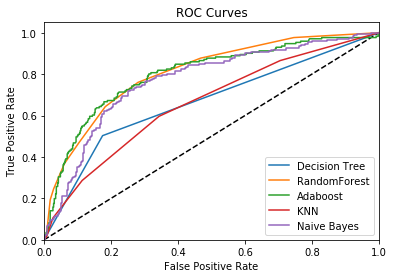

In [40]:
#ROC Curve
y_score_tree = tree_clf.predict_proba(x_test)[:,1]
y_score_rf = rf_clf.predict_proba(x_test)[:,1]
y_score_ab = ab_clf.predict_proba(x_test)[:,1]
y_score_knn = knn_clf.predict_proba(x_test)[:,1]
y_score_nb = nb_clf.predict_proba(x_test)[:,1]
# y_score_svm = svm_clf.predict_proba(x_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
# fpr_svm, tpr_svm, _ = roc_curve(y_test,y_score_svm)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')
# plt.plot(fpr_svm,tpr_svm,label='SVM')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [41]:
importances = ab_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(20):
    print("%d. %s (%f)" % (f + 1, x.iloc[:,indices[f]].name, importances[indices[f]]))

Feature ranking:
1. review_count (0.200000)
2. 3m_count_similar (0.100000)
3. 0.5m_count (0.060000)
4. 1m_count (0.060000)
5. 2m_count (0.060000)
6. income (0.060000)
7. 2m_count_similar (0.060000)
8. 3m_count (0.040000)
9. 0.5m_count_similar (0.040000)
10. rating (0.020000)
11. is_chain (0.020000)
12. BusinessParking.street (0.020000)
13. Alcohol (0.020000)
14. BusinessParking.lot (0.020000)
15. is_fastfood (0.020000)
16. WiFi (0.020000)
17. Ambience.trendy (0.020000)
18. price_ordinal (0.020000)
19. GoodForMeal.dessert (0.020000)
20. GoodForMeal.breakfast (0.020000)


(-1, 10)

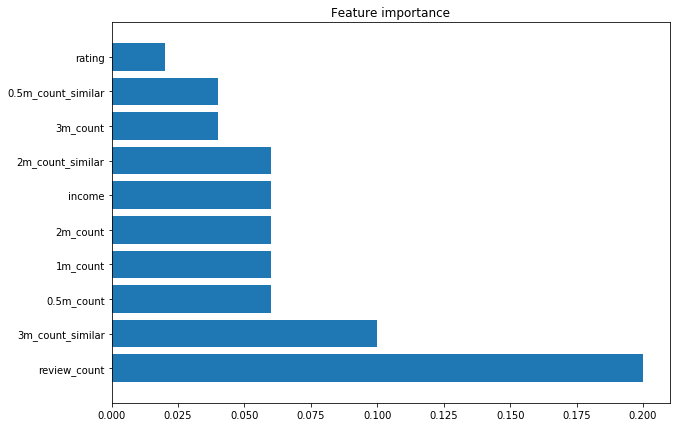

In [42]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], x.iloc[:,indices].columns)
plt.ylim([-1, 10])

In [43]:
len(x)

3313